# <a id="#">Task 4 – Edge detection: Derivative operators</a>

In [1]:
import numpy
import matplotlib.pyplot as plt

---

## Prewitt filters

**<a id="#">Task 4.1.1.</a>** Load the image `data/astronaut.png` and show it:

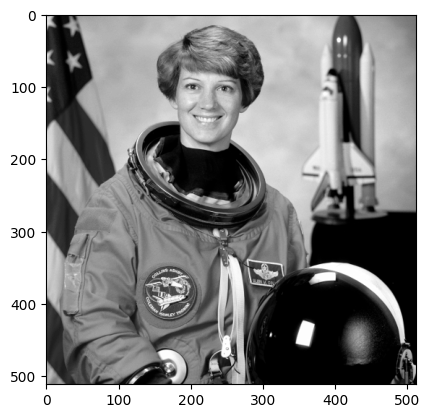

In [3]:
img=plt.imread('data/astronaut.png')
plt.imshow(img, 'gray')


**<a id="#">Task 4.1.2.</a>** Implement horizontal and vertical 3&times;3 Prewitt filters:

In [ ]:
def prewitt_h(img_in, size):
    result = numpy.zeros(img_in.shape)
    prewflt_h=numpy.asarray([[-1,0,1], [-1,0,1], [-1,0,1]])
    n = (size - 1) // 2  ## auch size weglassen und direkt 3 anwenden
    for p in numpy.ndindex(img_in.shape):
        if p[0]>=n and p[1]>=n and p[0] < img_in.shape[0]-n and p[1]< img_in.shape[1]-n:
            prewflt_h_sum=0
            for q in numpy.ndindex(size, size):
                prewflt_h_sum +=  prewflt_h[q] * img_in[p[0]-n+q[0], p[1]-n+q[1]]
                
            result[p]=prewflt_h_sum/6
    return result

def prewitt_v(img_in, size):
    result = numpy.zeros(img_in.shape)
    prewflt_v=numpy.asarray([[-1,-1,-1], [0,0,0], [1,1,1]])
    n = (size - 1) // 2
    for p in numpy.ndindex(img_in.shape):
        if p[0]>=n and p[1]>=n and p[0] < img_in.shape[0]-n and p[1]< img_in.shape[1]-n:
            prewflt_v_sum=0
            for q in numpy.ndindex(size, size):
                prewflt_v_sum +=  prewflt_v[q] * img_in[p[0]-n+q[0], p[1]-n+q[1]]
                
            result[p]=prewflt_v_sum/6
    return result

In [33]:
img_prewitt_h.shape

(3, 3)

**<a id="#">Task 4.1.3.</a>** Test your above solution using the functions `prewitt_h` and `prewitt_v` for the previously loaded image and show the result:

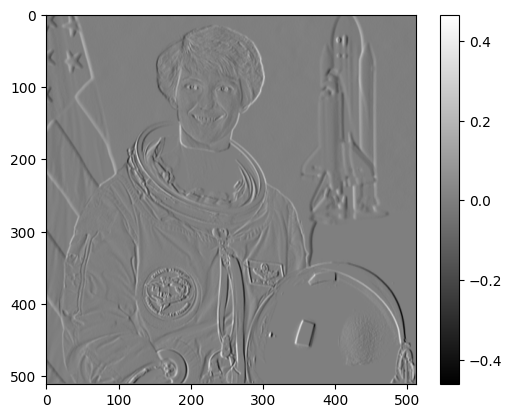

In [48]:
img_prewitt_h=prewitt_h(img, 3)
plt.imshow(img_prewitt_h, 'gray')
plt.colorbar()



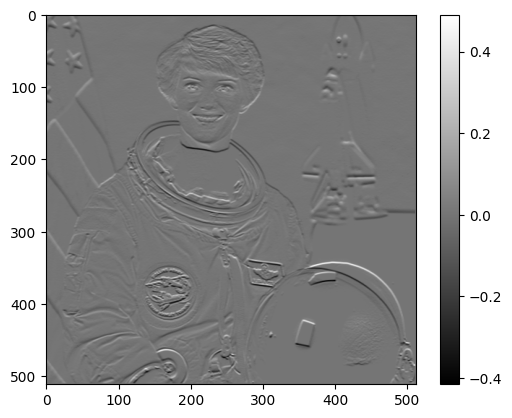

In [49]:
img_prewitt_v=prewitt_v(img, 3)
plt.imshow(img_prewitt_v, 'gray')
plt.colorbar()


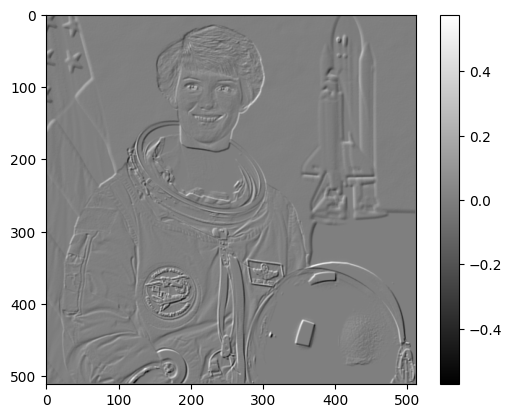

In [50]:
img_prewitt=prewitt_h(img, 3) + prewitt_v(img, 3)
plt.imshow(img_prewitt, 'gray')
plt.colorbar()

**<a id="#">Task 4.1.4.</a>** Compare your results with the correct result image `data/astronaut_prewitt_h.tiff` and `data/astronaut_prewitt_v.tiff`:

In [51]:
import skimage.io
control_h=skimage.io.imread('data/astronaut_prewitt_h.tiff')
control_v=skimage.io.imread('data/astronaut_prewitt_v.tiff')
assert numpy.allclose(img_prewitt_h, control_h, atol=1/255)
assert numpy.allclose(img_prewitt_v, control_v, atol=1/255)

---

## Edge detection

**<a id="#">Task 4.2.1.</a>** Use your results from **Task 4.1.2 – 4.1.3** to compute the *gradient magnitude* of the image:

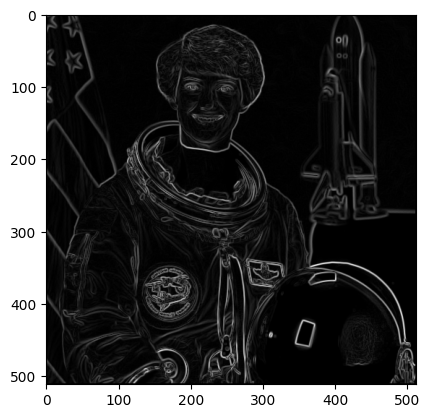

In [52]:
img_gradmag=numpy.sqrt(img_prewitt_h**2+img_prewitt_v**2)

plt.imshow(img_gradmag, 'gray')

**<a id="#">Task 4.2.2.</a>** Compare your result with the correct result image `data/astronaut_prewitt_gradmag.tiff`:

In [53]:
gradmag=skimage.io.imread('data/astronaut_prewitt_gradmag.tiff')
assert numpy.allclose(img_gradmag, gradmag, atol=1/255)

---

## Sobel filters (bonus)

**<a id="#">Task 4.3.1.</a>** Implement the two functions `sobel_h` and `sobel_v` for horizontal and vertical 3&times;3 Sobel filtering, respectively:

**<a id="#">Task 4.3.2.</a>** Test your above solution using the functions `sobel_h` and `sobel_v` for the previously loaded image and show the result:

**<a id="#">Task 4.3.3.</a>** Compare your results with the correct result image `data/astronaut_sobel_h.tiff` and `data/astronaut_sobel_v.tiff`: